Módulo: Estatística com Python<br>
Lista: Estatística básica<br>
Data: 10/2021

# Exercícios - Estatística I

### Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`
   

##### Carregando as principais bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando o dataset a partir da biblioteca seaborn
df_titanic = sns.load_dataset('titanic')
df_titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


**Q1:** Calcule a frequência absoluta para os sobreviventes no _Titanic_. 

In [3]:
# Mostra a frequência absoluta (contagem simples) dos sobreviventes
df_titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [4]:
print('Sobreviventes:', df_titanic['survived'].value_counts()[1])

Sobreviventes: 342


**Q2:** Calcule a frequência relativa, relativa percentual e acumulativa para os sobreviventes no _Titanic_.


In [5]:
# Mostra a frequência relativa (proporção) dos sobreviventes, relativa percentual
print('Frequência relativa (proporção):',round(df_titanic['survived'].value_counts(normalize=True)[1],2))
print('Frequência relativa (percentual):',round(100*df_titanic['survived'].value_counts(normalize=True)[1],2))

Frequência relativa (proporção): 0.38
Frequência relativa (percentual): 38.38


In [6]:
# Contruindo uma representação em tabela
freq_titanic_survivors = pd.DataFrame()
freq_titanic_survivors['survived'] = df_titanic['survived'].value_counts()
freq_titanic_survivors['freq_relativa'] = df_titanic['survived'].value_counts(normalize=True)
freq_titanic_survivors['freq_relativa %'] = 100* df_titanic['survived'].value_counts(normalize=True)
freq_titanic_survivors['freq_acumulada %'] =  freq_titanic_survivors['freq_relativa %'].cumsum()
round(freq_titanic_survivors,2)

,survived,freq_relativa,freq_relativa %,freq_acumulada %
0,549,0.62,61.62,61.62
1,342,0.38,38.38,100.00


**Q3:** Utilizando a coluna `Age` do _dataset Titanic_, defina as principais métricas estatísticas para essa variável tais como:
- Média;
- Desvio Padrão;
- Mínimo;
- Primeiro Quartil;
- Segundo Quartil (Mediana);
- Terceiro Quartil;
- Distância Interquartil (IQR);
- Máximo;
- Skewness;
- Moda.

##### Verificando diferentes maneiras de extrair os dados

In [7]:
print('Média:\t\t', round(df_titanic['age'].mean(), 2))
print('Desvio padrão:\t', round(df_titanic['age'].std(), 2))
print('Mínimo:\t\t', df_titanic['age'].min())
print('Q1:\t\t', np.nanquantile(df_titanic['age'], 0.25))
print('Q2 (mediana):\t', np.nanquantile(df_titanic['age'], 0.50))
print('Q3:\t\t', np.nanquantile(df_titanic['age'], 0.75))
q3, q1 = np.nanpercentile(df_titanic['age'],[75, 25])
print('Interq. (IQR):\t', q3-q1)
print('Máximo:\t\t',df_titanic['age'].max())
print('Skewness:\t', round(df_titanic['age'].skew(),3))
print('Moda:\t\t', df_titanic['age'].mode()[0])

Média:		 29.7
Desvio padrão:	 14.53
Mínimo:		 0.42
Q1:		 20.125
Q2 (mediana):	 28.0
Q3:		 38.0
Interq. (IQR):	 17.875
Máximo:		 80.0
Skewness:	 0.389
Moda:		 24.0


###### O método .describe() do Pandas traz diversas dessas medidas 

In [8]:
# Pandas describe:
df_titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

**Q4:** Crie um gráfico da dispersão das idades dos passageiros do _Titanic_ e identifique os pontos onde se encontram a média, mediana e moda das idades.

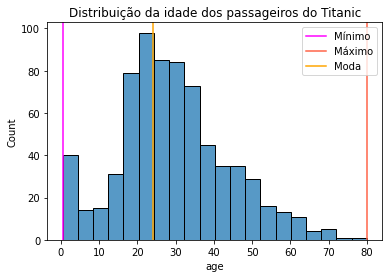

In [9]:
# Na representação gráfica
sns.histplot(df_titanic['age'])

# plotando a mediana
plt.axvline(df_titanic['age'].min(), color="magenta", label="Mínimo")
plt.axvline(df_titanic['age'].max(), color="tomato", label="Máximo")
plt.axvline(df_titanic['age'].mode()[0], color="orange", label="Moda")

plt.title('Distribuição da idade dos passageiros do Titanic')

# Cria uma legenda
plt.legend();

**Q5:** Ainda trabalhando com os valores das idades crie três _Boxplots_:
- _Boxplot_ das idades para todos os passageiros;
- _Boxplot_ das idades dos passageiros separados pelo sexo.
- _Boxplot_ das idades dos passageiros separados pelo sexo e por sobreviventes.

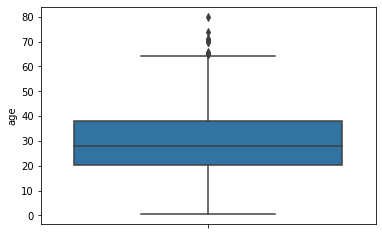

In [10]:
sns.boxplot(data=df_titanic,y='age');

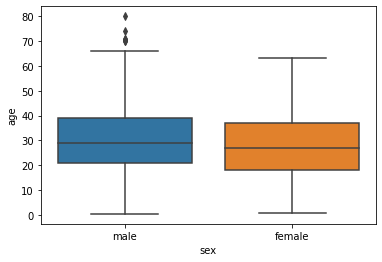

In [11]:
sns.boxplot(data=df_titanic,y='age',x='sex');

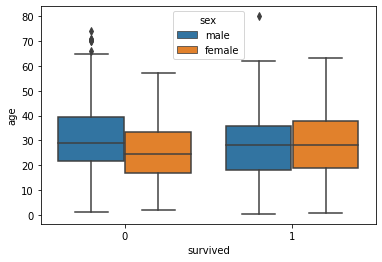

In [12]:
sns.boxplot(data=df_titanic,y='age',x='survived', hue='sex');

### Com o dataset `penguins`, responda as questões abaixo:

In [13]:
df_pinguins = sns.load_dataset('penguins')
df_pinguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


**Q6:** Classifique o tipo de dado de cada coluna

In [14]:
df_pinguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [15]:
df_pinguins.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

In [16]:
df_pinguins.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male


Pelas informações acima, as colunas com dados categóricos são 'species', 'island' e 'sex', e as demais colunas possuem dados contínuos.

**Q7:** Calcule a frequência absoluta para cada espécie de pinguim

In [17]:
df_pinguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

**Q8:** Calcule a frequência relativa, relativa percentual e acumulativa para cada espécie de pinguim.

In [18]:
# Contruindo uma representação em tabela
df_especies_pinguins = pd.DataFrame()
df_especies_pinguins['freq. absoluta'] = df_pinguins['species'].value_counts()
df_especies_pinguins['freq. relativa'] = df_pinguins['species'].value_counts(normalize=True)
df_especies_pinguins['freq. relativa %'] = df_pinguins['species'].value_counts(normalize=True)*100
df_especies_pinguins['freq. acumulativa'] = df_especies_pinguins['freq. relativa %'].cumsum()

round(df_especies_pinguins,2)

,freq. absoluta,freq. relativa,freq. relativa %,freq. acumulativa
Adelie,152,0.44,44.19,44.19
Gentoo,124,0.36,36.05,80.23
Chinstrap,68,0.20,19.77,100.00


**Q9:**: Utilizando a coluna `body_mass_g` do dataset Penguins, defina as principais métricas estatísticas para essa variável tais como:

- Média;
- Desvio Padrão;
- Mínimo;
- Primeiro Quartil;
- Segundo Quartil (Mediana);
- Terceiro Quartil;
- Distância Interquartil (IQR);
- Máximo;
- Skewness;
- Moda.

In [19]:
df_pinguins['body_mass_g'].describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [20]:
df_pinguins['body_mass_g'].skew()

0.470329330480123

In [21]:
df_pinguins['body_mass_g'].mode()

0    3800.0
dtype: float64

**Q10:** Crie um gráfico da dispersão da massa dos pinguins e identifique os pontos onde se encontram a média, mediana e moda das idades.

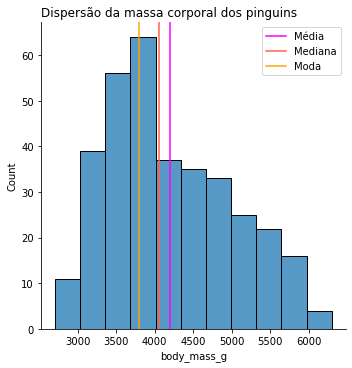

In [22]:
sns.displot(df_pinguins['body_mass_g'])

# plotando a mediana
plt.axvline(df_pinguins['body_mass_g'].mean(), color="magenta", label="Média")
plt.axvline(df_pinguins['body_mass_g'].median(), color="tomato", label="Mediana")
plt.axvline(df_pinguins['body_mass_g'].mode()[0], color="orange", label="Moda")

plt.title('Dispersão da massa corporal dos pinguins',loc='left')

# Cria uma legenda
plt.legend();

**Q11:** Ainda trabalhando com os valores das massas dos pinguins crie três Boxplots:

- Boxplot das massas para todos os pinguins
- Boxplot das massas dos pinguins separados pelo sexo.
- Boxplot das massas dos pinguins separados pelo sexo e pela espécies.

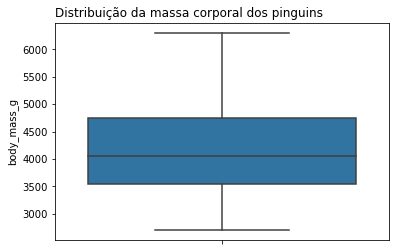

In [23]:
sns.boxplot(data=df_pinguins, y='body_mass_g')
plt.title('Distribuição da massa corporal dos pinguins',loc='left');

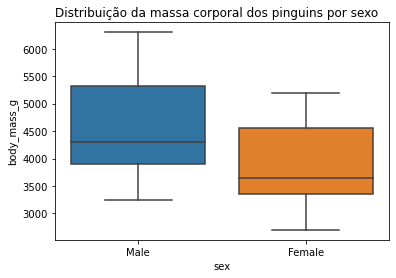

In [24]:
sns.boxplot(data=df_pinguins, y='body_mass_g',x='sex')
plt.title('Distribuição da massa corporal dos pinguins por sexo',loc='left');

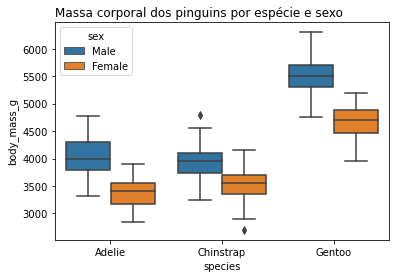

In [25]:
sns.boxplot(data=df_pinguins, y='body_mass_g',x='species',hue='sex')
plt.title('Massa corporal dos pinguins por espécie e sexo',loc='left');